In [7]:
import matplotlib.pyplot as plt
from pprint import pprint
from os import listdir
import pandas as pd
import numpy as np

In [17]:
ls = listdir('outputs/')
list = [l for l in ls if '.csv' in l]
list

avg_corr = {}

for filename in list:
    ingest = pd.read_csv('outputs/{}'.format(filename),header=None)
    corrMatrix = ingest.iloc[:,1:].corr()
    tri = np.triu(np.ones(corrMatrix.shape),1).astype(bool)
    cross = [[corrMatrix.iloc[x,y] if tri[x,y] else 0 for x in range(len(tri))] for y in range(len(corrMatrix))]
    avg = np.sum(cross) / np.count_nonzero(cross)
    avg_corr[filename[:-4]] = [ingest.iloc[-1,-1] ,avg]

pprint(avg_corr)

{'AsymmetricUtility': [2276, 0.9793917826311105],
 'BaseAt4': [265, 0.9990406966624604],
 'Baseline': [0, 0.9993653593508636],
 'Bimodal3and6': [5947, 0.8929659057777041],
 'BinomSym3': [0, 0.9996786194708911],
 'BinomSym4': [2205, 0.9984692796627254],
 'BinomSym4LongRun': [2356, 0.9766878297988622],
 'FiveByNeighboorhoods': [0, 0.9992804607818385],
 'Integrationist': [5004, 0.9041819060924364],
 'IntegrationistAsymmetric': [3171, 0.9987941147621255],
 'IntegrationistSparse': [2681, 0.9552039638356898],
 'IntegrationistWithEmpty': [2494, 0.8227803567267047],
 'LargeMajority': [27, 0.9981457559336203],
 'LargeMajorityLowDensity': [120, 0.9973101095131449],
 'LessAsymmetricUtility': [2358, 0.9959356131499515],
 'LessAsymmetricUtilityLessDenseLongRun': [2255, 0.9953599528782617],
 'LessAsymmetricUtilityLongRun': [1797, 0.9982665665443413],
 'SevenByNeighboorhoods': [0, 0.9987265936770766],
 'SixGroups': [667, 0.9995279887239704],
 'SixGroupsLongRun': [25, 0.9998904424348918],
 'ThreeGroup

In [8]:
def compare(list):
    fig1 = plt.figure(figsize=(9, 4.5))
    ax1 = fig1.add_subplot(111)
    
    for filename in list:
        ingest = pd.read_csv('outputs/{}.csv'.format(filename),header=None)
        labs = [filename + '_Rep' + str(n) for n in range(1,ingest.shape[1])]
        df = ingest.iloc[:,1:].copy()
        df.columns=labs
        #ax1.plot(df, label=labs)
        ax1.plot(df)
    plt.legend(loc="best")
    plt.show()

No handles with labels found to put in legend.


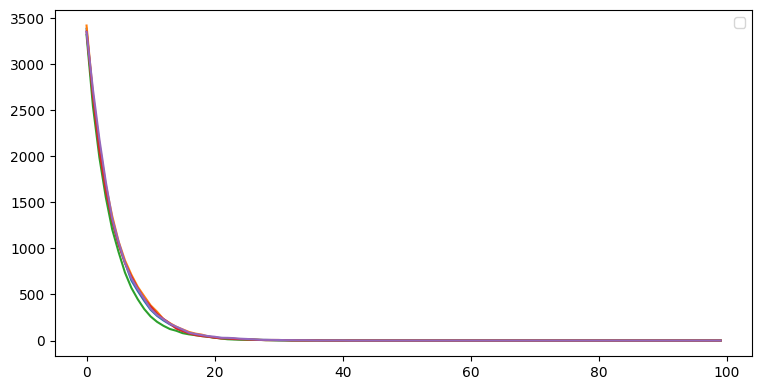

In [67]:
compare(['Baseline'])

No handles with labels found to put in legend.


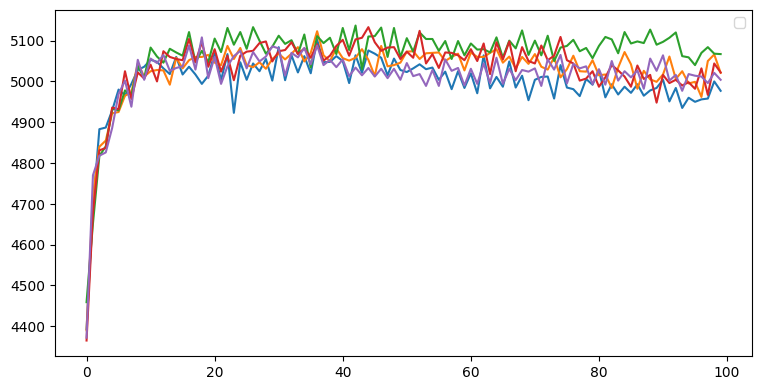

In [74]:
compare(['Integrationist'])

No handles with labels found to put in legend.


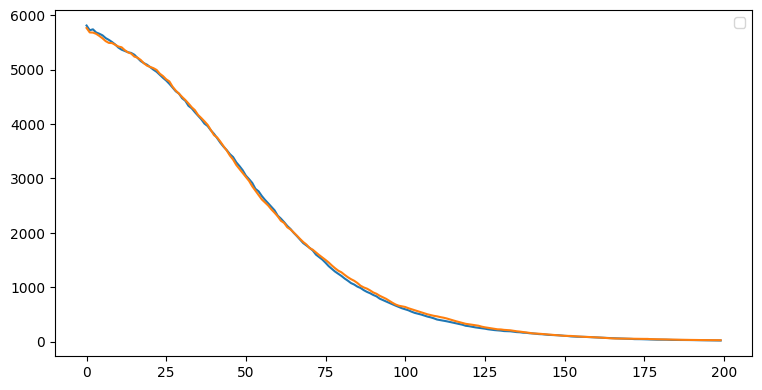

In [72]:
compare(['SixGroupsLongRun'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


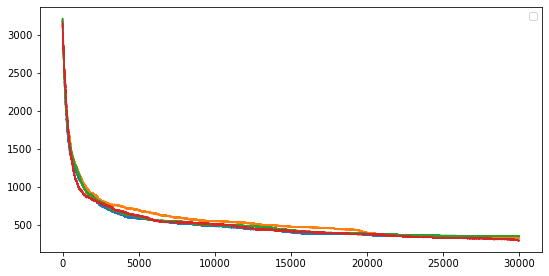

In [9]:
compare(['IntegrationistSparseVeryLong'])

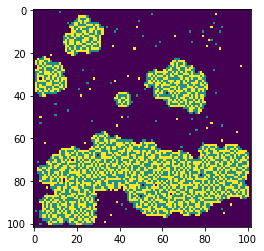

In [28]:
from Schelling import *
import csv
def updateLong(frameNum,grid,gridSize,agents,x,y,nbrhd=3,img=None,line=None):  
    # copy grid since we require 8 neighbors  
    # for calculation and we go line by line  
    newGrid = np.zeros([gridSize+2,gridSize+2]) 
    # find the list of open cells
    open = np.argwhere(grid[1:gridSize+1,1:gridSize+1]==0)
    for agent in agents:
        if(agent.unhappy and len(open)>0):
            # select a random opening and move
            o = np.random.randint(0,len(open))
            i = open[o][0]+1    # index correction
            j = open[o][1]+1    # from argwhere shift
            agent.i = i
            agent.j = j
            # delete the opening from list
            open = np.delete(open,o,0)
        newGrid[agent.i,agent.j] = agent.color
        
    # check for unhappy agents
    _,n = checkHappy(agents,newGrid,nbrhd)
    # update data 
    if img: img.set_data(newGrid) 
    grid[:] = newGrid[:] 

    if line: line.set_data(x,y)
    return img, x, n, line

def long_experiment(demographic=None,gridSize=100,nbrhd=3,frames=50,reps=5,filename='test'):
    demographics = demographic or {
        1:{'population':5000,'tolerance':0.3},
        2:{'population':1000,'tolerance':0.3}}
    big_Y = []
    #initialize grid
    grid = np.zeros([gridSize+2,gridSize+2])

    #instantiate agents
    agents = []
    agents = initAgents(agents,demographics)

    #place agents
    [agents,grid]= placeAgents(agents,grid,gridSize)
    #data collection
    x,y =[],[]
    f = 0
    try:
        while True:
            _,x,n,_ = updateLong(f,grid, gridSize, agents,x,y,nbrhd)
            big_Y.append([n])
            f += 1
            if n == 0: break
    except KeyboardInterrupt:
        pass
    #np.savetxt("outputs/{}.csv".format(filename), 
    #       big_Y,
    #       delimiter =", ", 
    #       fmt ='% s')
    with open("outputs/{}.csv".format(filename), 'w+', newline ='') as f:
      
    # using csv.writer method from CSV package
        write = csv.writer(f)
        write.writerows(big_Y)
    #
    fig, (ax1) = plt.subplots() 
    img = ax1.imshow(grid, interpolation='nearest') 
    fig.savefig('images/{}.png'.format(filename))
    plt.show() 


integrationistSparse = {
    1:{
    'population':2000,
    'ufunc': lambda t,agent : (t[0.5]) > 2 and t[1] > 1},
    2:{
    'population':2000,
    'ufunc': lambda t,agent : (t[1]) > 2 and t[0.5] > 1}
}
long_experiment(integrationistSparse, filename='IntegrationistSparseVeryLong2',frames=30000,reps=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


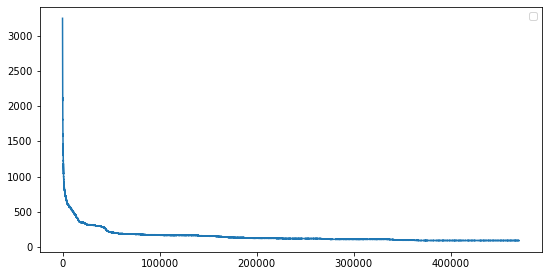

In [31]:
fig1 = plt.figure(figsize=(9, 4.5))
ax1 = fig1.add_subplot(111)

df = pd.read_csv('outputs/IntegrationistSparseVeryLong2.csv',header=None)
#ingest = pd.read_csv('outputs/IntegrationistSparseVeryLong2.csv'.format(filename),header=None)
#labs = [filename + '_Rep' + str(n) for n in range(1,ingest.shape[1])]
#df = ingest.iloc[:,1:].copy()
#df.columns=labs
#ax1.plot(df, label=labs)
ax1.plot(df)
plt.legend(loc="best")
plt.show()